In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import time
import os


In [13]:
#Lectura del archivo de la BD
df_bd_original = pd.read_csv('BD/OnlineRetailcsv.csv', sep=',', encoding = 'unicode_escape')
df_bd_original.head(5)
#df_bd_original.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
def Analisis1D_SinPreprocesar(csv_no_preprocesado):
    #Análisis 1D a la BD sin preprocesar
    print("\n*******\t\tAnálsis 1D de BD sin preprocesar\t\t*******\n")
    headers  = csv_no_preprocesado.columns
    for  column in headers:
        if csv_no_preprocesado[column].dtype  in ("int64", float) :
            print( "la columna {} tiene un promedio de =  {} " .format(column,  csv_no_preprocesado[column].mean()))
            print( "la columna {} tiene un mediana de =  {} " .format(column,  csv_no_preprocesado[column].median()))
            print( "la columna {} tiene una desviación estandar  de =  {} " .format(column,  csv_no_preprocesado[column].std()))
            print( "la columna {} tiene un máximo de =  {} " .format(column,  csv_no_preprocesado[column].max()))
            print( "la columna {} tiene un mínimo de =  {} " .format(column,  csv_no_preprocesado[column].min()))
            print ("-----------------------------------------------------------------------------")
        if  csv_no_preprocesado[column].dtype  in ("object", "datetime64[ns]" ) :
            print( "la columna {} tiene como moda a =  {} " .format(column,  csv_no_preprocesado[column].mode()))
            print ("-----------------------------------------------------------------------------")
            
def Analisis1D_Preprocesada(csv_preprocesado):
    #Análisis 1D a la BD preprocesada
    print("\n*******\t\tAnálsis 1D de BD preprocesada\t\t*******\n")
    headers  = csv_preprocesado.columns
    for  column in headers:
        if csv_preprocesado[column].dtype  in ("int64", float) :
            print( "la columna {} tiene un promedio de =  {} " .format(column,  csv_preprocesado[column].mean()))
            print( "la columna {} tiene un mediana de =  {} " .format(column,  csv_preprocesado[column].median()))
            print( "la columna {} tiene una desviación estandar  de =  {} " .format(column,  csv_preprocesado[column].std()))
            print( "la columna {} tiene un máximo de =  {} " .format(column,  csv_preprocesado[column].max()))
            print( "la columna {} tiene un mínimo de =  {} " .format(column,  csv_preprocesado[column].min()))
            print ("-----------------------------------------------------------------------------")
        if  csv_preprocesado[column].dtype  in ("object", "datetime64[ns]" ) :
            print( "la columna {} tiene como moda a =  {} " .format(column,  csv_preprocesado[column].mode()))
            print ("-----------------------------------------------------------------------------")


In [14]:
#Obtenemos el análisis 1D de la BD sin preprocesar

Analisis1D_SinPreprocesar(df_bd_original)
os.system("PAUSE")
#df_bd_original.describe()


*******		Análsis 1D de BD sin preprocesar		*******

la columna InvoiceNo tiene como moda a =  0    573585
dtype: object 
-----------------------------------------------------------------------------
la columna StockCode tiene como moda a =  0    85123A
dtype: object 
-----------------------------------------------------------------------------
la columna Description tiene como moda a =  0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object 
-----------------------------------------------------------------------------
la columna Quantity tiene un promedio de =  9.55224954743324 
la columna Quantity tiene un mediana de =  3.0 
la columna Quantity tiene una desviación estandar  de =  218.08115784986612 
la columna Quantity tiene un máximo de =  80995 
la columna Quantity tiene un mínimo de =  -80995 
-----------------------------------------------------------------------------
la columna InvoiceDate tiene como moda a =  0    10/31/2011 14:41
dtype: object 
-------------------------------

0

In [15]:
####################################################################
#Ahora comenzamos a preprocesar la BD
print("\n*******COMIENZA EL PREPROCESAMIENTO*******")
#detectamos la cantidad de tuplas que tengan la columna Quantity en negativo
df_quantity_negative = df_bd_original.loc[df_bd_original['Quantity'] < 0]
#detectamos la cantidad de tuplas que tengan la columna CustomerID NULL
df_null = df_bd_original.loc[df_bd_original['CustomerID'].isna()]
#df_deletenull elimina las tuplas con CustomerID = NULL y el resultado se almacena aca mismo
df_deletenull = df_bd_original.dropna(subset=['CustomerID'])
#detecta las tuplas con Quantity negativo en la bd sin nulls
df_quantity_negative_2 = df_deletenull.loc[df_deletenull['Quantity'] < 0]
#se elimina las tuplas con Quantity negativo restantes y se almacena la BD preprocesada en df_bd_nueva
df_bd_nueva = df_deletenull.drop(df_deletenull[df_deletenull['Quantity']<0].index)
#Eliminamos las tuplas duplicadas de la BD nueva, almacenandose en df_bd_nueva_final
#Comprobamos si existen tuplas duplicadas
df_filas_duplicadas = df_bd_nueva[df_bd_nueva.duplicated()]
#Ahora obtenemos la BD nueva sin filas duplicadas
df_bd_nueva_final = df_bd_nueva.drop_duplicates()
#print(df_bd_nueva.count())
#df_bd_nueva_final.describe()

print("\nFormato de muestra de registros (cant.filas , columnastotales)\n")
print("-------------------- PREPROCESAMIENTO --------------------")
print("Cantidad de tuplas totales en la BD original:", df_bd_original.shape)
print("Cantidad de tuplas con Quantity negativo:", df_quantity_negative.shape)
print("Cantidad de tuplas con CustomerId = NULL:", df_null.shape)
print("BD nueva sin las tuplas con CustomerID = null:", df_deletenull.shape)
print("Cantidad de tuplas restantes con Quantity < 0 en la BD nueva:", df_quantity_negative_2.shape)
print("Cantidad de tuplas totales de la BD nueva preprocesada:", df_bd_nueva.shape)
print("Número de filas duplicadas: ", df_filas_duplicadas.shape)
print("Total de filas de BD nueva sin filas duplicadas: ",df_bd_nueva_final.shape)
print("----------------------------------------------------------")
#Ya tenemos la BD preprocesada almacenada en df_bd_nueva_final

####################################################################



*******COMIENZA EL PREPROCESAMIENTO*******

Formato de muestra de registros (cant.filas , columnastotales)

-------------------- PREPROCESAMIENTO --------------------
Cantidad de tuplas totales en la BD original: (541909, 8)
Cantidad de tuplas con Quantity negativo: (10624, 8)
Cantidad de tuplas con CustomerId = NULL: (135080, 8)
BD nueva sin las tuplas con CustomerID = null: (406829, 8)
Cantidad de tuplas restantes con Quantity < 0 en la BD nueva: (8905, 8)
Cantidad de tuplas totales de la BD nueva preprocesada: (397924, 8)
Número de filas duplicadas:  (5192, 8)
Total de filas de BD nueva sin filas duplicadas:  (392732, 8)
----------------------------------------------------------


In [16]:
def Histograma_Frecuencia_Productos(csv_preprocesado):
    #Histograma de productos: Frecuencia de aparición de variables en un intervalo
    print("Se visualiza el Histograma de Frecuencia de Productos")
    
    csv_preprocesado.Description.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
    plt.title("Frecuencia de productos")
    plt.ylabel('Frecuencia del producto')
    plt.xlabel('Producto')
    plt.show();
    print ("-----------------------------------------------------------------------------")
    #Se muestra en pantalla el Histograma de Frecuencia de productos
    ###############
    
   
    ###############
    
def Histograma_Frecuencia_Paises(csv_preprocesado):
    #Histograma de paises: Frecuencia de aparición de variables en un intervalo
    
    print("Se visualiza el Histograma de Frecuencia de Paises")
    
    csv_preprocesado.Country.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
    plt.title("Frecuencia de paises")
    plt.ylabel('Frecuencia del país')
    plt.xlabel('Pais')
    plt.show();
    print ("-----------------------------------------------------------------------------")
    #Se muestra en pantalla el Histograma de Frecuencia de paises
    ###############
    
    
    ###############
    
def Histograma_Frecuencia_Cant_Producto(csv_preprocesado):
    #Histograma de cantidad de productos: Frecuencia de aparición de variables en un intervalo
    
    print("Se visualiza el Histograma de Frecuencia de Cantidad de productos")
    
    csv_preprocesado.Quantity.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
    plt.title("Frecuencia de Cantidad de Productos")
    plt.ylabel('Frecuencia')
    plt.xlabel('Cantidad de productos')
    plt.show();
    print ("-----------------------------------------------------------------------------")
    #Se muestra en pantalla el Histograma de Frecuencia de cantidad de productos
    ###############
    
    
    ###############
    
def Mapa_de_Calor(csv_preprocesado):
    #Mapas de calor: Necesario para encontrar variables dependientes de otra(s)
    print("Se visualiza el Mapa de calor")
    
    plt.figure(figsize=(10,5))
    Mapa_calor= csv_preprocesado.corr()
    
    sns.heatmap(Mapa_calor,cmap="BrBG",annot=True)
    plt.show();
    #print(Mapa_calor)
    print ("-----------------------------------------------------------------------------")
    #Se muestra en pantalla el Mapa de Calor 
    ###############
    
    
    ###############
    
def Diagrama_de_Dispersion(csv_preprocesado):
    #Scatterplot (Diagrama de dispersión) para encontrar la correlación entre dos variables
    #Debe ser algo como "a mas valor de x, mayor valor de Y..."
    
    print("Se visualiza el Diagrama de dispersión")
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(csv_preprocesado['Description'], csv_preprocesado['UnitPrice'])
    ax.set_xlabel('Description')
    ax.set_ylabel('UnitPrice')
    plt.show();
    print ("-----------------------------------------------------------------------------")
    #Se muestra en pantalla el Diagrama de dispersión
    ###############
    
    
    ###############
    
def Analisis2D_Preprocesada(csv_preprocesado):
    Histograma_Frecuencia_Productos(csv_preprocesado)
    Histograma_Frecuencia_Paises(csv_preprocesado)
    Histograma_Frecuencia_Cant_Producto(csv_preprocesado)
    Mapa_de_Calor(csv_preprocesado)
    #Diagrama_de_Dispersion(csv_preprocesado)


*******		Análsis 1D de BD preprocesada		*******

la columna InvoiceNo tiene como moda a =  0    576339
dtype: object 
-----------------------------------------------------------------------------
la columna StockCode tiene como moda a =  0    85123A
dtype: object 
-----------------------------------------------------------------------------
la columna Description tiene como moda a =  0    WHITE HANGING HEART T-LIGHT HOLDER
dtype: object 
-----------------------------------------------------------------------------
la columna Quantity tiene un promedio de =  13.15371805709746 
la columna Quantity tiene un mediana de =  6.0 
la columna Quantity tiene una desviación estandar  de =  181.58841959350687 
la columna Quantity tiene un máximo de =  80995 
la columna Quantity tiene un mínimo de =  1 
-----------------------------------------------------------------------------
la columna InvoiceDate tiene como moda a =  0    11/14/2011 15:27
dtype: object 
--------------------------------------

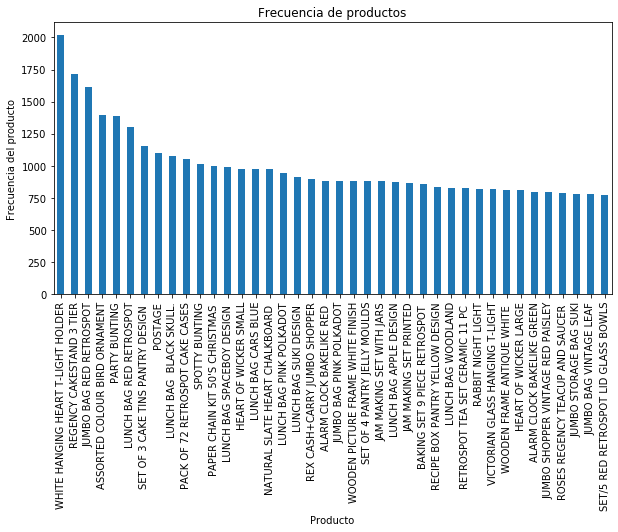

-----------------------------------------------------------------------------
Se visualiza el Histograma de Frecuencia de Paises


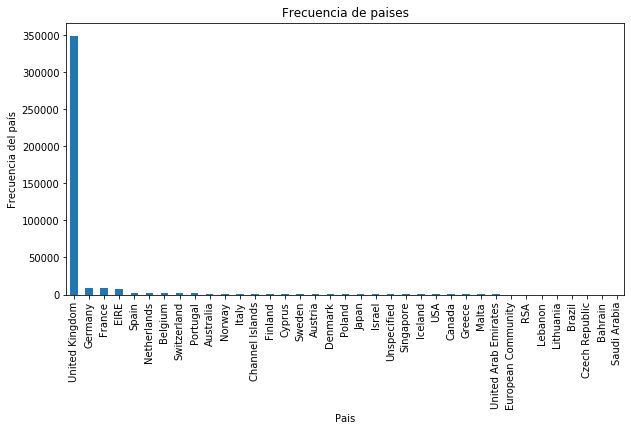

-----------------------------------------------------------------------------
Se visualiza el Histograma de Frecuencia de Cantidad de productos


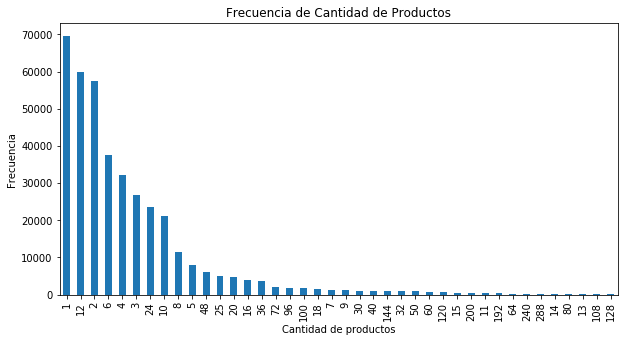

-----------------------------------------------------------------------------
Se visualiza el Mapa de calor


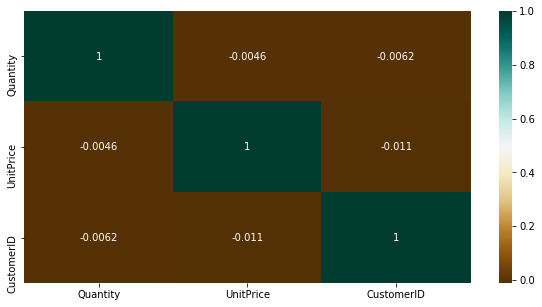

-----------------------------------------------------------------------------


0

In [10]:
#Obtenemos el análisis 1D de la BD ya preprocesada
Analisis1D_Preprocesada(df_bd_nueva_final)
os.system("PAUSE")

Analisis2D_Preprocesada(df_bd_nueva_final)
os.system("PAUSE")